# Sandpiles Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Initial Algoritm

In [ ]:
def simulate_sand_pile(N = 100, E = 0.1, critical_slope = 5, n_iter = 20_000, plot = False, record_movement = False):
  np.random.seed(0)

  sand = np.zeros(N)
  tsav = np.zeros(n_iter + 1)  #quantity of sand moved in one temporal iteration
  mass = np.zeros(n_iter + 1)

  if record_movement: move_list = np.zeros([n_iter + 1, N])

  for i in range(1, n_iter + 1):     # temporal iteration
    move = np.zeros(N)
    
    for j in range(0, N - 1):
      slope = abs(sand[j] - sand[j+1])

      if slope >= critical_slope:
        avrg = (sand[j] + sand[j + 1]) / 2
        move[j] += (avrg - sand[j]) / 2
        move[j + 1] += (avrg - sand[j+1]) / 2
        tsav[i] += slope/4
    
    if tsav[i] > 0:
      sand += move
    
    else:
      j = np.random.randint(0, N)
      sand[j] += np.random.uniform(0, E)

    sand[N - 1] = 0
    mass[i] = np.sum(sand)

    if record_movement:
      move_list[i] = np.array([abs(i) for i in move])

    
    # print("{0}, mass {1}.".format(i, mass[i]))

  if plot:
    plt.subplot(2, 1, 1)
    plt.plot(range(0, n_iter + 1), mass)
    plt.ylabel('Sandpile Mass')
    plt.subplot(2, 1, 2)
    plt.plot(range(0, n_iter + 1), tsav)
    plt.ylabel('Displaced mass')
    plt.xlabel('iteration')
    plt.show()
  
  if record_movement:
    return tsav, mass, move_list
  else:
    return tsav, mass



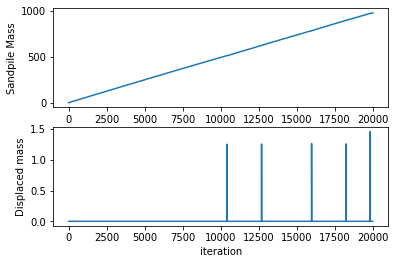

[0.00000000e+00 5.92844618e-02 1.19560799e-01 ... 9.76990099e+02
 9.77028164e+02 9.77111217e+02]


In [ ]:
tsav, mass = simulate_sand_pile(plot = True)

### Better Algorithm (listing)


In [ ]:
def simulate_sand_pile_faster(N = 100, E = 0.1, critical_slope = 5, n_iter = 20_000, plot = False, record_movement = False):
  np.random.seed(0)

  sand = np.zeros(N)
  tsav = np.zeros(n_iter + 1)  #quantity of sand moved in one temporal iteration
  mass = np.zeros(n_iter + 1)  #quatity of sand in all model during one temporal iteration

  if record_movement: move_list = np.zeros([n_iter + 1, N])

  next_instability = set()

  for i in range(1, n_iter + 1):     # temporal iteration

    move = np.zeros(N)
    
    instability = next_instability.copy()
    next_instability.clear()

    # print(instability) 

    for j in instability:

      if j >= 1:
        slope = abs(sand[j - 1] - sand[j])

        if slope >= critical_slope:
          avrg = (sand[j - 1] + sand[j]) / 2
          move[j - 1] += (avrg - sand[j - 1]) / 2
          move[j] += (avrg - sand[j]) / 2
          tsav[i] += slope/4

          next_instability.add(j)
          next_instability.add(j - 1)

      if j < (N - 1):
        slope = abs(sand[j] - sand[j + 1])
          
        if slope >= critical_slope:
          avrg = (sand[j] + sand[j + 1]) / 2
          move[j] += (avrg - sand[j]) / 2
          move[j + 1] += (avrg - sand[j+1]) / 2
          tsav[i] += slope/4

          next_instability.add(j)
          next_instability.add(j + 1)

    if tsav[i] > 0:
      sand += move
    
    else:
      j = np.random.randint(0, N)
      sand[j] += np.random.uniform(0, E)

      next_instability.add(j)

    sand[N - 1] = 0
    mass[i] = np.sum(sand)

    if record_movement:
      move_list[i] = np.array([abs(i) for i in move])

    # print("{0}, mass {1}.".format(i, mass[i]))

  if plot:
    plt.subplot(2, 1, 1)
    plt.plot(range(0, n_iter + 1), mass)
    plt.ylabel('Sandpile Mass')
    plt.subplot(2, 1, 2)
    plt.plot(range(0, n_iter + 1), tsav)
    plt.ylabel('Displaced mass')
    plt.xlabel('iteration')
    plt.show()
  
  if record_movement:
    return tsav, mass, move_list
  else:
    return tsav, mass


In [ ]:
tsav, mass = simulate_sand_pile_faster(plot = True)

### Tests

Assertion Code

In [ ]:
tsav1, mass1 = simulate_sand_pile()
tsav2, mass2 = simulate_sand_pile_faster()

assert tsav1 in tsav2, "The result is not the same for tsav"
assert mass1 in mass2, "The result is not the same for mass"

Speed Comparison

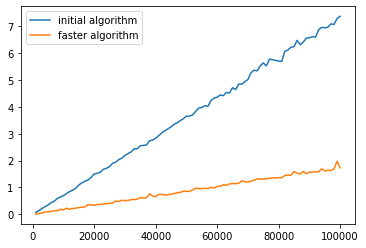

In [ ]:
import time

initial_func_perf = []
faster_func_perf = []

test_n_iter = range(1_000, 100_001, 1_000)

for i in test_n_iter:
  start = time.perf_counter()
  simulate_sand_pile(n_iter = i)
  end = time.perf_counter()
  initial_func_perf.append(end - start)

  start = time.perf_counter()
  simulate_sand_pile_faster(n_iter = i)
  end = time.perf_counter()
  faster_func_perf.append(end - start)

plt.plot(test_n_iter, initial_func_perf, label = "initial algorithm")
plt.plot(test_n_iter, faster_func_perf, label = "faster algorithm")

plt.legend()
plt.show()


In [ ]:
print(initial_func_perf)
print(faster_func_perf)

[0.26756820700029493, 0.1649274149986013, 0.23162051000144857, 0.31055365599968354, 0.3661621709998144, 0.428934952000418, 0.5083211330002086, 0.5901838660010981, 0.6610246099990036, 0.734446399999797, 0.8172063570000319, 0.8844825839987607, 0.9555308190010692, 1.012573854999573, 1.0820073030008643, 1.1840874350000377, 1.2116577039996628, 1.3124490519985557, 1.3591394659997604, 2.70205838900074, 1.500769708000007, 1.5813874909999868, 1.8023669890008023, 2.2935061210009735, 2.8202454740003304, 1.8792459289998078, 2.0169330110002193, 1.9966088799992576, 2.079165662999003, 2.17411570799959, 2.22305367700028, 2.3750803929997346, 2.460134011000264, 2.508283578999908, 2.566837424001278, 2.561440251998647, 2.695110773000124, 2.862284284999987, 2.867570127998988, 2.914364702999592, 3.0160378599994146, 3.009193599000355, 3.0989744599992264, 3.2937236510006187, 3.1854818960000557, 3.405920490000426, 3.4349800199997844, 3.5608070730013424, 3.562808304999635, 3.5749423279994517, 3.6356395999991946

# Representative Simulation
Code to represent how our sand pile varies according to iteration number

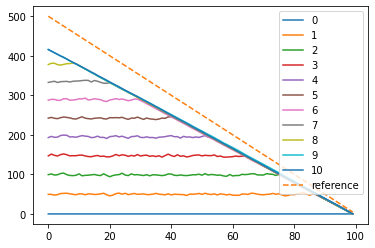

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def represent_sand_pile(N = 100, E = 0.1, critical_slope = 5, n_iter = 1_000_000):
  sand = np.zeros(N)
  avalanche = False
  count = 0

  for i in range(0, n_iter + 1):     # temporal iteration
    move = np.zeros(N)
    
    for j in range(0, N - 1):
      slope = abs(sand[j+1] - sand[j])

      if slope >= critical_slope:
        avrg = (sand[j] + sand[j + 1]) / 2
        move[j] += (avrg - sand[j]) / 2
        move[j + 1] += (avrg - sand[j+1]) / 2
        avalanche = True
    
    if avalanche:
      sand += move
      avalanche = False
    
    else:
      j = np.random.randint(0, N)
      sand[j] += np.random.uniform(0, E)

    sand[N - 1] = 0

    if (i % 100_000) == 0:
      # print(sand)
      plt.plot([i for i in range(N)], sand, label = count)
      count += 1
  
  plt.plot([i for i in range(N)], [500 - i*5 for i in range(N)], "--", label = "reference")
  plt.legend()
  plt.show()

represent_sand_pile()

# Sandpile Mass & Displaced mass

In [ ]:
#Sand Pile modeling

n_iter = 2_000_000
tsav, mass, move_list = simulate_sand_pile(n_iter = n_iter, record_movement = True)

Text(0, 0.5, 'Sand mass')

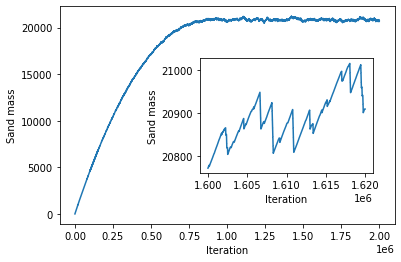

In [ ]:
#Main plot
plt.plot(range(0, n_iter + 1), mass)
plt.xlabel("Iteration")
plt.ylabel("Sand mass")

#Subplot
plt.axes([.45, .3, .4, .4])
plt.plot(range(int(16 * 1e5), int(16.2 * 1e5)), [mass[i] for i in range(int(16 * 1e5), int(16.2 * 1e5))])

plt.xlabel("Iteration")
plt.ylabel("Sand mass")

Text(0, 0.5, 'Sand mass')

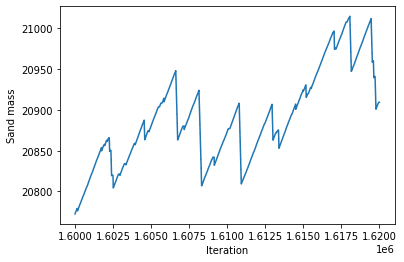

In [ ]:
#Subplot full size
plt.plot(range(int(16 * 1e5), int(16.2 * 1e5)), [mass[i] for i in range(int(16 * 1e5), int(16.2 * 1e5))])

plt.xlabel("Iteration")
plt.ylabel("Sand mass")


[]

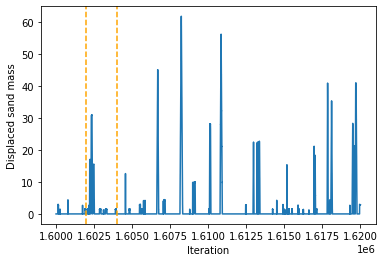

In [ ]:
#Displacement plot

plt.plot(range(int(16 * 1e5), int(16.2 * 1e5)), [tsav[i] for i in range(int(16 * 1e5), int(16.2 * 1e5))])

plt.xlabel("Iteration")
plt.ylabel("Displaced sand mass")

# Marks for spatiotemporal unfolding
x1 = 1.602 * 1e6
plt.axvline(x = x1, color = "orange", linestyle = "--")
plt.axvline(x = x1 + 2000, color = "orange", linestyle = "--")

plt.plot()

### Spatiotemporal unfolding of avalanches 

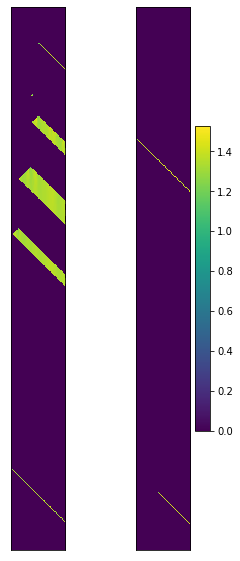

In [ ]:
#Create subplots
fig, axs = plt.subplots(1, 2, figsize = (4, 10))

# 1st 1,000 iterations
axs[0].imshow(move_list[int(x1): int(x1 + 1e3)], interpolation = "nearest")
# 2nd 1,000 iterations
im = axs[1].imshow(move_list[int(x1 + 1e3): int(x1 + 2e3)], interpolation = "nearest")

for i in range(2):
  axs[i].set_yticklabels([])
  axs[i].set_xticklabels([])
  axs[i].set_yticks([])
  axs[i].set_xticks([])

fig.colorbar(im)
plt.show()

#Other Avalanche Measurement  
Avalanche energy (E) = sum of all displaced mass over the duration of an avalanche

Avalanche peak (P) = largest displaced mass value produced in an avalanche

Avalanche duration (T) = number of iterations elapsed from the beggining of an avalanche

In [14]:
def measure_av(n_iter, tsav):
  n_max_av = 100_000            #Avalanches limit
  e_av = np.zeros(n_max_av)   #Avalanche energy series
  p_av = np.zeros(n_max_av)   #Avalanche peadk series
  t_av = np.zeros(n_max_av)   #Avalanche duration series

  n_av, sum, istart, avmax = -1, 0, 0, 0
  for i in range (1, n_iter):

    if tsav[i] > 0 and tsav[i - 1] == 0: #Avalanche begins
      sum, avmax = 0, 0
      istart = i

      if n_av == n_max_av - 1:
        print("too many avalanches")
        break
      
      n_av += 1    # Avalanches counter
    
    sum += tsav[i] # Acumulated displaced mass

    if tsav[i] > avmax:   # Avalanche peak
      avmax = tsav[i]

    if tsav[i] <= 0 and tsav[i - 1] > 0: # Avalanche ends
      e_av[n_av] = sum
      p_av[n_av] = avmax
      t_av[n_av] = i - istart

  return n_av, e_av, p_av, t_av

# Correlation Graphic

Text(0, 0.5, 'Sand mass')

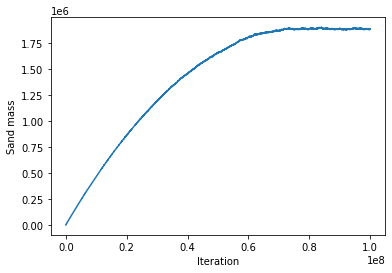

In [ ]:
n_iter = 100_000_000
tsav, mass = simulate_sand_pile_faster(n_iter = n_iter, N = 1000)

#aux plot
plt.plot(range(0, n_iter + 1), mass)
plt.xlabel("Iteration")
plt.ylabel("Sand mass")

Text(0, 0.5, 'Sand mass')

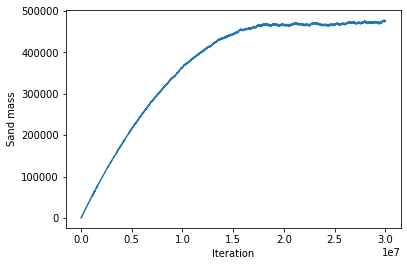

In [ ]:
n_iter2 = 30_000_000
tsav2, mass2 = simulate_sand_pile_faster(n_iter = n_iter2, N = 500)

#aux plot
plt.plot(range(0, n_iter2 + 1), mass2)
plt.xlabel("Iteration")
plt.ylabel("Sand mass")

In [15]:
n_av, e_av, p_av, t_av = measure_av(int(5e6), tsav2[int(2.5e7):int(3e7)])

In [16]:
len(e_av)

100000

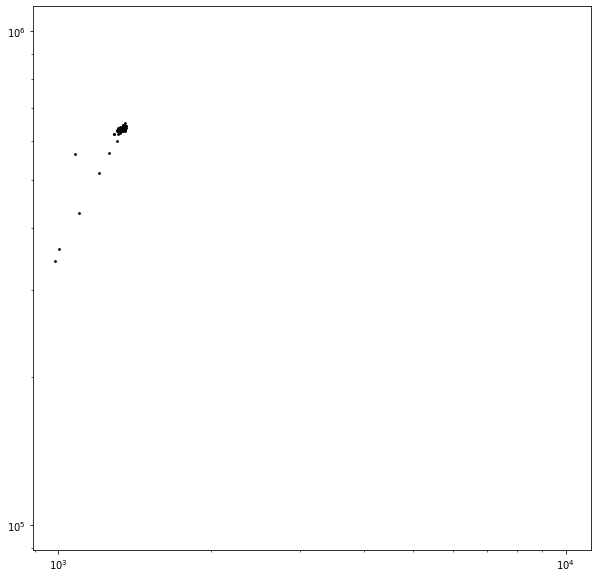

In [25]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(t_av, e_av, s = 3, color = "black")
ax.set_yscale('log')
ax.set_xscale('log')

# Dúvidas

(solved) Atualizar a avalanche de forma síncrona não faz ficar enviesado?

